# ${\textbf{Customer Analytics - Positioning & Purchase Analytics}}$

## ${\textbf{Dataset Information}}$

We'll start by visually examining the data set.This will provide us with a sense of what information and features it contains, will also examine the resemblance and the difference between the data contained in this dataset and the segmentation dataset. Finally, we'll make use of the segmentation model we built to divide our new customers into segments.


The dataset contains purchases of 500 individuals at one particular grocery store every day for 2 years. For each day we know whether the individual had visited the grocery store and we know all the items they had purchased. We will only focus on the purchases of chocolate candy bars.

Although the dataset is greatly simplified, it allow us to examine a lot of the challenges you may face in the process of building models of purchase behavior.

## ${\textbf{Libraries}}$

In [71]:
import numpy as np
import pandas as pd
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

## ${\textbf{Data Import}}$

In [2]:
df_purchase = pd.read_csv("DATA/purchase data.csv")
df_purchase.tail()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,1,0,0,0,0,42,1,120946,1,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,0,42,1,120946,1,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,0,42,1,120946,1,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,0,42,1,120946,1,0
58692,200000500,726,0,0,0,2,1,1.51,1.82,2.09,...,0,0,0,0,0,42,1,120946,1,0


## ${\textbf{Data Exploration}}$

You may remember during segmentation, we used the described method to gain a summary statistic, but in this case, the descriptive statistics here wouldn't be very useful. The reason for that is that for each customer, we have a road denoting each time they visited the store and each customer may have visited the store a different number of times throughout the two years that data was collected.

All of these imply we **don't have an equal number of records per customer and we don't have an equal number of records per day, so, descriptive statistics would neither be useful nor appropriate**.

In [3]:
# Check for missing values
print(df_purchase.isna().sum(),'\n')

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64 





Since we have no missing data,the next step is to applying the segmentation model we built earlier in order to group transactions by segments.

## ${\textbf{Data Segmentation}}$

### ${\textbf{Import Segmentation Model}}$

In [4]:
# Import models (pickle objects)
scaler = pickle.load(open("Models/00-scaler.pickle", "rb"))
pca = pickle.load(open("Models/01-pca.pickle", "rb"))
kmeans_pca = pickle.load(open("Models/02-kmeans_pca.pickle", "rb"))

### ${\textbf{Standardization}}$

In [5]:
# Standardize purchase data using the standard scaler (7 demographic features)
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education',
                        'Income', 'Occupation', 'Settlement size']]

# Standardized dataframe
df_purchase_segm_std = scaler.transform(features)

### ${\textbf{PCA}}$

We'll use PCA transform on our standardized features. The result is the PCA scores for every line, please take into consideration that customers appear on more than one transaction or line, so, we will have some duplicates.



In [6]:
# Apply pca on the purchase data and get 3 principal components for each row in the df
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

### ${\textbf{K-means PCA}}$

In [7]:
# Use predict from pca to segment the purchase data into the 4 segments
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [8]:
# Changing the predictors dataframe, by adding and changing columns
df_purchase_predictors = df_purchase.copy()

# Add segment information as new column in predictors dataframe
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

## ${\textbf{Descriptive Analysis by Segments}}$

### ${\textbf{Data Analysis by Customer}}$

We will divide the purchase analytics into two major parts descriptive analysis and modeling. Now, we will focus on descriptives, the first step is to group or data by individuals and then by segments to gain insight into customers shopping habits, how often each segment group go shopping, how much money they spend and what products they purchase.

In [9]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


The rows in the purchase dataset reflect each purchase location, so there are as many rows per individual as there are store visits. Often we may be interested in having one record per individual in order to analyze the data on an individual level.

So with that in mind, let's create a new data frame, which is organized so we will be able to create a summary of each customer's purchasing behavior.

In [10]:
# Estimate total number of visits per customer
temp1 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index=False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence': 'Num_Visits'})
temp1.head()

,Num_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [11]:
# Estimate total number of purchases per customer
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence': 'Num_Purchases'})

# Join number of visits with amount of purchases
temp3 = temp1.join(temp2)
temp3.tail()

,Num_Visits,Num_Purchases
ID,,
200000496,120,20
200000497,120,43
200000498,131,39
200000499,106,31
200000500,124,15


In [12]:
# Estimate average number of purchases per customer
temp3['Average_Num_Purchases'] = temp3['Num_Purchases'] / temp3['Num_Visits']
temp3.head()

,Num_Visits,Num_Purchases,Average_Num_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [19]:
# We obtain the segment for each customer in the data set.
temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index=False).mean()
temp4 = temp4.set_index('ID')

# Join segment mean column per customer
df_purchase_descr = temp3.join(temp4)
df_purchase_descr.head(10)

,Num_Visits,Num_Purchases,Average_Num_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,2
200000002,87,11,0.126437,3
200000003,97,10,0.103093,2
200000004,85,11,0.129412,2
200000005,111,13,0.117117,1
200000006,86,10,0.116279,1
200000007,83,16,0.192771,1
200000008,97,15,0.154639,2
200000009,102,9,0.088235,2


### ${\textbf{Segment Proportions}}$

In [22]:
# Estimate the proportions of each segment
segm_prop = df_purchase_descr[['Num_Purchases', 'Segment']] \
                    .groupby(['Segment']).count() / df_purchase_descr.shape[0]

segm_prop = segm_prop.rename(columns = {'Num_Purchases': 'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0,0.206
1,0.220
2,0.378
3,0.196


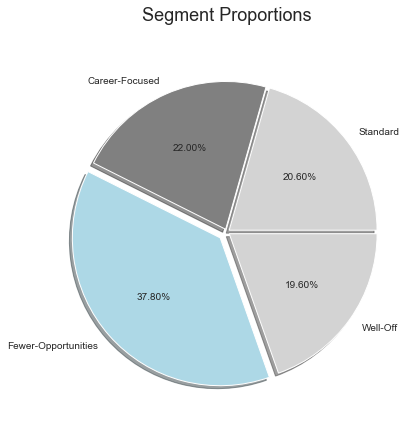

In [44]:
plt.figure(figsize = (9, 6))

plt.pie(segm_prop['Segment Proportions'],
        labels = ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'],
        autopct = '%1.2f%%', 
        colors = ('lightgrey', 'grey', 'lightblue', 'lightgrey'),
        explode=(0.02, 0.02, 0.06, 0.02),
       shadow=True)

plt.title('Segment Proportions\n', fontsize=18)

plt.tight_layout()
plt.show()

### ${\textbf{Purchase Occasion and Purchase Incidence}}$

We will find a quantitative measure to describe the purchase behaviors by segments in general, in other words, we'd like to know:
- How often people from different segments visit the store?
- How often do they buy chocolate candy bars?
- How often do they buy relative to the number of their store visits?

In [45]:
# Calculate the mean by the four segments
# It will help us determine the average customer behaivour in each segment
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,Num_Visits,Num_Purchases,Average_Num_Purchases
Segment,,,
0,117.699029,24.902913,0.212773
1,123.454545,39.827273,0.283102
2,113.730159,22.756614,0.201588
3,117.295918,34.602041,0.284478


In [46]:
# We calculate the standard deviation by segments
# It will help us determine how homogoneus each of the segments is
segments_std = df_purchase_descr.groupby(['Segment']).std()
segments_std

,Num_Visits,Num_Purchases,Average_Num_Purchases
Segment,,,
0,19.039605,16.774464,0.126603
1,44.864656,53.744530,0.200056
2,16.410498,13.815040,0.120335
3,20.716152,25.900579,0.171787


$\hookrightarrow$ **How often to people from different segments visit the store?**

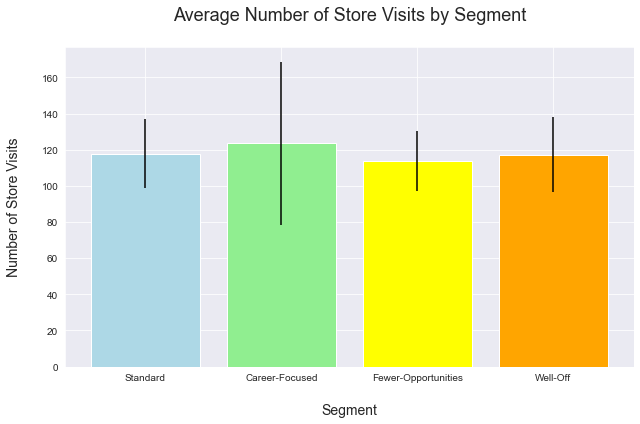

In [50]:
plt.figure(figsize = (9, 6))

plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'), 
        height = segments_mean['Num_Visits'],
        yerr = segments_std['Num_Visits'],
        color = ('lightblue', 'lightgreen', 'yellow', 'orange'))

plt.xlabel('\nSegment', fontsize=14)
plt.ylabel('Number of Store Visits\n', fontsize=14)
plt.title('Average Number of Store Visits by Segment\n', fontsize=18)

plt.tight_layout()
plt.show()

We can see that the Fewer-Opportunities segment visits the store, least often while the Career-Focused segment visits the store a lot. However, the standard deviation amongst customers from the second segment is quite high, this implies that the customers in this segment are at least homogenous.

It seems that the **standard fewer opportunities and well-off clusters are very similar in terms of their average store purchases**. This is welcome information because it would make them more comparable with respect to our future analysis.

$\hookrightarrow$ **How often the client buys a product**

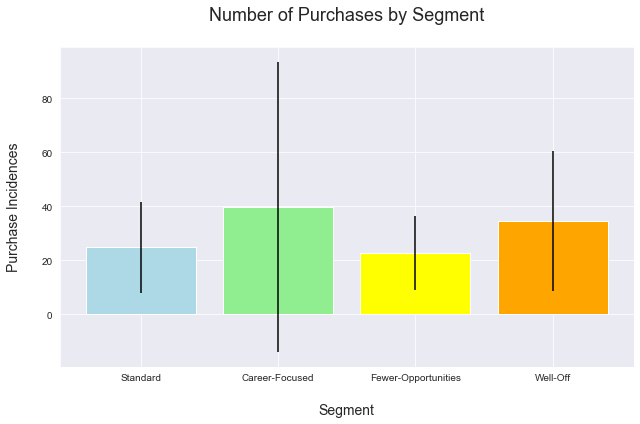

In [51]:
plt.figure(figsize = (9, 6))

plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'), 
        height = segments_mean['Num_Purchases'],
        yerr = segments_std['Num_Purchases'],
        color = ('lightblue', 'lightgreen', 'yellow', 'orange'))

plt.xlabel('\nSegment', fontsize=14)
plt.ylabel('Purchase Incidences\n', fontsize=14)
plt.title('Number of Purchases by Segment\n', fontsize=18)

plt.tight_layout()
plt.show()

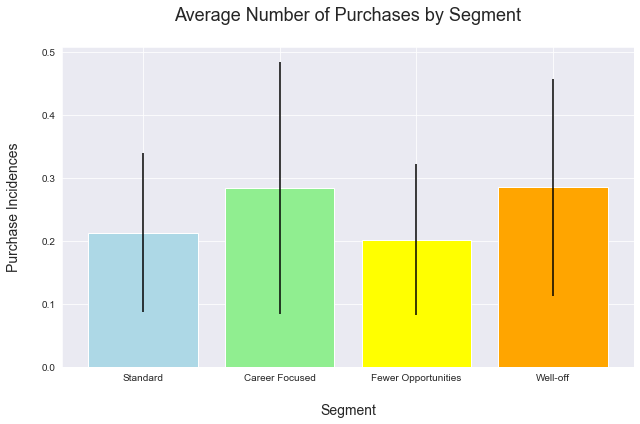

In [53]:
plt.figure(figsize = (9, 6))

plt.bar(x = (0, 1, 2, 3), 
        tick_label = ('Standard','Career Focused','Fewer Opportunities','Well-off'),
        height = segments_mean['Average_Num_Purchases'], 
        yerr = segments_std['Average_Num_Purchases'], 
        color = ('lightblue', 'lightgreen', 'yellow', 'orange'))

plt.xlabel('\nSegment', fontsize=14)
plt.ylabel('Purchase Incidences\n', fontsize=14)
plt.title('Average Number of Purchases by Segment\n', fontsize=18)

plt.tight_layout()
plt.show()

### ${\textbf{Brand Choice by Segment}}$

$\hookrightarrow$**Which brand is the customer going to choose?**


We will be interested in brand choice alone. This means we'll focus only on the observations where customers have bought at least one chocolate candy bar. To achieve that, we can take the purchase predictors, data frame and choose only those observations where incidents equals one.


Here's the tricky part, we can directly group by segments, but that would count each transaction on its own, therefore, if one customer bought on 30 different occasions, that would be counted as 30 different customers, **thus, biasing our results. We can avoid this if route by segment first and then by ID**.

In [55]:
# Select only rows where incidence is one, only interested in the times a purchase was made
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]

In [56]:
# Here we make dummies for each of the five brands.
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'],
                               prefix = 'Brand',
                               prefix_sep = '_')

# Add segment and id cols to brand_dummies dataframe
brand_dummies['Segment'] = df_purchase_incidence['Segment']
brand_dummies['ID'] = df_purchase_incidence['ID']
brand_dummies.tail()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
58621,0,1,0,0,0,2,200000500
58648,1,0,0,0,0,2,200000500
58674,0,1,0,0,0,2,200000500
58687,0,1,0,0,0,2,200000500
58691,0,1,0,0,0,2,200000500


In [57]:
# Groupby 1: ID
temp = brand_dummies.groupby(['ID'], as_index = True).mean()

# Groupby 2: Segment
mean_brand_choice = temp.groupby(['Segment'], as_index = True).mean()

Each of the numbers here shows the average proportion of brand choices for each segment, **a very important note is that the five brands are arranged in ascending order of price. In other words, Brand one is the cheapest brand, while brand five is the most expensive one.** This is how the data set itself is ordered. However, **it's crucial to take into account when conducting brand analysis**.

> **TIP**: When performing a brand analysis, it's crucial that brands are arranged in ascending order of price (cheapest to expensive).

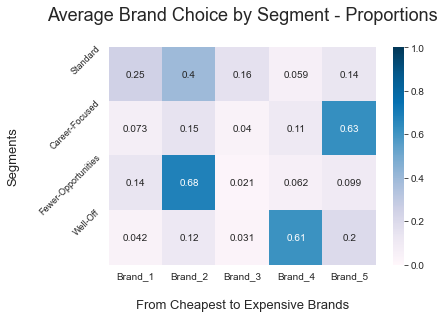

In [68]:
sns.heatmap(mean_brand_choice,
            vmin=0, 
            vmax=1,
            cmap='PuBu',
            annot=True,
            cbar=True)
plt.yticks([0, 1, 2, 3],
           ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'],
           rotation=45,
           fontsize=9)
plt.xlabel("\nFrom Cheapest to Expensive Brands", fontsize=13)
plt.ylabel("Segments\n", fontsize=13)
plt.title('Average Brand Choice by Segment - Proportions\n', fontsize=18)
plt.show()

**Brand Choice by Segment - Analysis**

- **Fewer-Opportunities Segment**: It shows an extremely strong preference for brand 2 to almost 70%  of the segment chooses brand 2 of chocolate above others. Certainly, isn't the cheapest one, so, we can say **the price of chocolate bars isn't what matters most to our customers in this segment**.

- **Career-Focused Segment**:  Notice that 63% of the career focused segment buys Brand 5, which is the most expensive brand, it seems that this cluster of young, ambitious, career focused individuals enjoys this fancy candy bar with no additional information. We can **speculate that the career focused segment is looking for some kind of luxury status, and this alone may be an opportunity to raise the price of Brand 5 even further**.

- **Well-Off Segment**: Interestingly enough, this segment **enjoys one of the most luxurious brands, brand 4, but is not the most expensive brand, and is by far the most widely bought brand**, followed by Brand 5.

- **Standard Segment**: It's more than obvious they this segment preference is scattered all around. Bearing that in mind, **if we're looking for actionable insight, one idea is to try to influence them to try out different brands**.


Overall, this is one of the most high level brand choice summaries we can get, it doesn't provide any information about how these preferences affect our revenues. So, that we will explore the revenue by segment.

### ${\textbf{Revenue by Segment}}$


We'll see what the total spending of the segments is, so, we'll calculate the revenues for each brand by segment and the total revenue for each of the 4 segments.

In [78]:
# Filter data for brand 1
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]

# Calculate revenue brand 1
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']

# Dataframe to store revenue brands by segments
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']] \
                                                    .groupby(['Segment']
                                                             ,as_index=False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1
0,0,2611.19
1,1,736.09
2,2,2258.90
3,3,699.47


In [79]:
# Compute revenue for brand 2
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']] \
                                                    .groupby(['Segment'],as_index=False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2
0,0,2611.19,4768.52
1,1,736.09,1746.42
2,2,2258.90,13955.14
3,3,699.47,1298.23


In [80]:
# Compute revenue for brand 3
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:, 'Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 3']] = temp[['Segment', 'Revenue Brand 3']] \
                                                    .groupby(['Segment'],as_index=False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3
0,0,2611.19,4768.52,3909.17
1,1,736.09,1746.42,664.75
2,2,2258.90,13955.14,716.25
3,3,699.47,1298.23,731.35


In [81]:
# Compute revenue for brand 4
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:, 'Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 4']] = temp[['Segment', 'Revenue Brand 4']] \
                                                    .groupby(['Segment'],as_index=False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4
0,0,2611.19,4768.52,3909.17,861.38
1,1,736.09,1746.42,664.75,2363.84
2,2,2258.90,13955.14,716.25,1629.31
3,3,699.47,1298.23,731.35,14185.57


In [82]:
# Compute revenue for brand 5
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:, 'Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 5']] = temp[['Segment', 'Revenue Brand 5']] \
                                                    .groupby(['Segment'],as_index=False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5
0,0,2611.19,4768.52,3909.17,861.38,2439.75
1,1,736.09,1746.42,664.75,2363.84,19441.06
2,2,2258.90,13955.14,716.25,1629.31,2230.50
3,3,699.47,1298.23,731.35,14185.57,5509.69


In [83]:
# Compute the total revenue for each of the segments
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                           segments_brand_revenue['Revenue Brand 2'] +
                                           segments_brand_revenue['Revenue Brand 3'] +
                                           segments_brand_revenue['Revenue Brand 4'] +
                                           segments_brand_revenue['Revenue Brand 5'])
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


In [84]:
# Add segments by their name to the revenues dataframes
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'] \
                                                    .map({0:'Standard',
                                                          1:'Career-Focused',
                                                          2:'Fewer-Opportunities',
                                                          3:'Well-Off'})
# Set the segment as index of dataframe
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
Fewer-Opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196


$\hookrightarrow$ **Let's analyze the results**

Starting with the *Total Revenues by Segment's*, Career-Focused Segment brings the most revenue, followed by Fewer-Opportunities Segment, then Well-Off Segment and in final place the Standard Segment accounts for the smallest part of the total revenue. 

Next, we've got the segment sizes next to the revenue. Apparently, **even though segment Career-Focused is the second largest, it brings the top 1 in revenue, this is an extremely interesting finding**. We had so far was that career focused was buying the most expensive brand.However, it seems that they are by far the most prominent segment for the store with regard to chocolate candy bars.

*What about the other segments?*

The standard is almost equal in size, but it brings less than half that revenue, in fact, this segment contributes the least of all segments. In comparison, the well-off and the fewer opportunity segments spend around the same amount of money on chocolate candy bars with the note that the latter is twice the size of the former. This shows that we should examine different measures together, rather than independently.

**Marketing Point of View**

We can see that Brand 3 has the lowest revenue compared to the other four and also it is the middle brand in terms of price. Its highest contributor is the Standard segment. As we've established, they'd like the first three brands so they can be influenced to buy more of the third brand. So, a good attack plan for this segment can be: if Brand 3 reduces its price, it is likely that the Standard segment clients would pivot towards Brand 3. Of course, nothing is certain, but it might be worth testing.

About Brand 4, their customers seem to come almost exclusively from the Well-Off segment, and the rest of the customers in this segment who didn't choose this brand, bought an even more expensive alternative, Brand 5.

Therefore, they seem to be loyal and not really affected by price, therefore brand for Catterick cautiously increasing its price. The hypothesis here is they'd likely retain most of its customers and increase the revenue per sale.

We've gained some insight into our customers, but, these are only assumptions based on what we've observed in our dataset.